# Advertising

### TV, Radyo ve Gazete ilanlarına göre satış rakamları var.
   1. Buradan Sales Sütunu hedef yani y=df['Sales'] TV, radyo ve gazeteye ayrı ayrı ne kadar yatırım yaparsam 
         satış rakamlarım ne kadar artar 
   2. Hangi reklam yönteminin daha başarılı olduğunu bulacaksınız.
   3. Test olarak ayırdığınız veri ile tahmin ettiğiniz veriyi aynı grafikte line chart ile görselleştireceksiniz.

In [16]:
#Gerekli kütüphaneleri import ediyoruz
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Dataseti okuma ve EDA işlemleri

In [18]:
df=pd.read_csv('advertising.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [22]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [24]:
abs(df.corr()['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

### Outlier Analizi

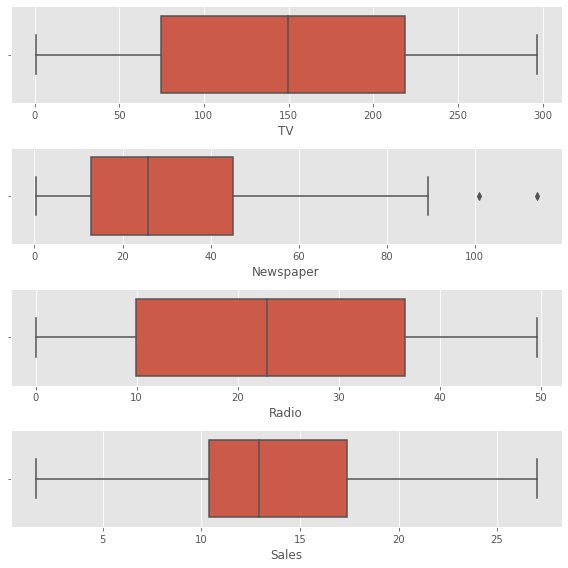

In [25]:
fig, axs = plt.subplots(4, figsize = (8,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'], ax = axs[3])
plt.tight_layout()

### Korelasyon haritası

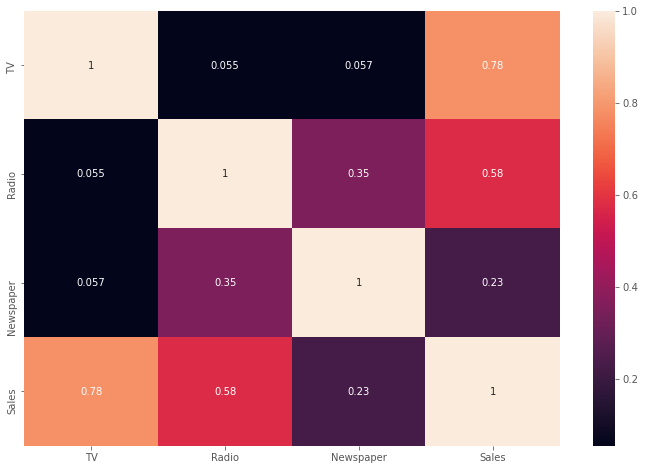

In [26]:
sns.heatmap(df.corr(), annot = True)
plt.show()

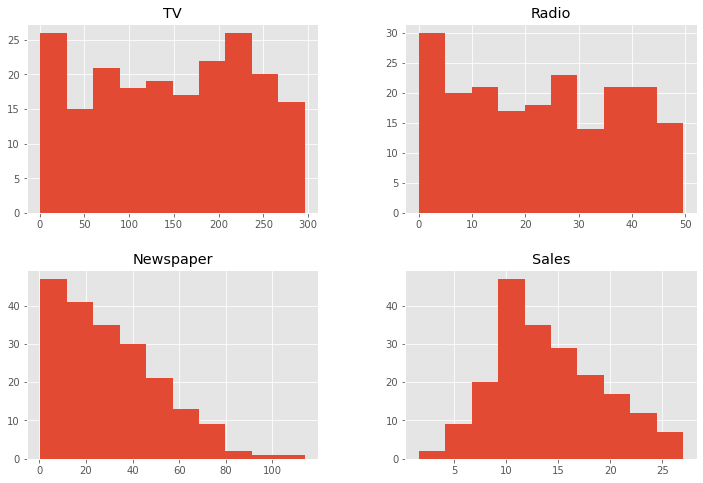

In [27]:
#Her sütun için ayrı ayrı histogram dğerlerine bakıldı.
#Tv ve Radio harcamaları dğılımı benzer, Newspaper bütçesi daha az
df.hist(bins = 10)
plt.show()

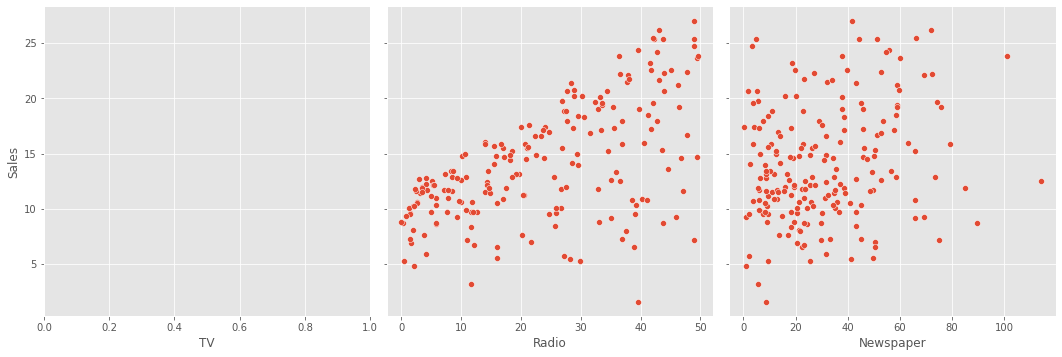

In [28]:
#Sales sütunu ile diğer sütunların ayrı ayrı dağılımına bakıldı
sns.pairplot(data = df, x_vars = ['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1);

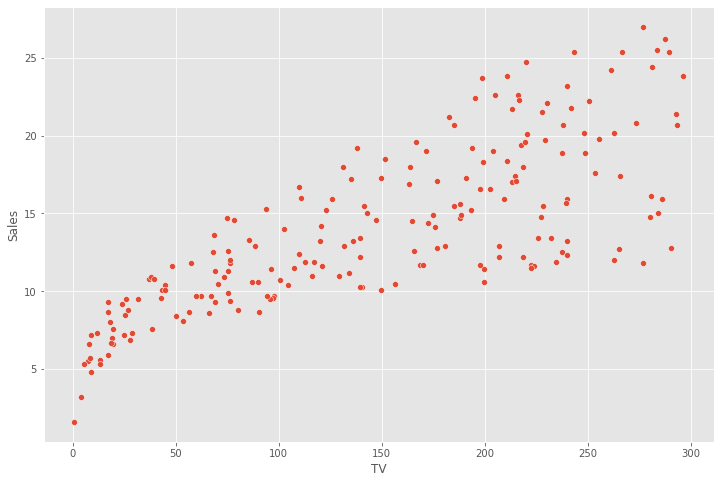

In [29]:
#Yukarıdaki grafikte TV sütunu çıkmadığı için bu sütun ayrı ele alındı
sns.scatterplot(data = df, x ='TV',y='Sales')
plt.show()

### Eğim ve katsayı tespiti

In [30]:
x1 = df.drop('Sales',axis=1)
y1 = df["Sales"]

model_1 = LR.fit(x1, y1)

print(f"Linear coefficients : {LR.coef_}")#katsayılar. TV,Radio, Newspaper
print(f"Intercept : {LR.intercept_}") # Eğim

#Katsayılar bize ilgili sütundaki artış veya azalış miktarının katsayı ile çarpılarak  
#Sales sütunundaki sonucunu verir
# y = m +a*x1 + b*x2 + c*x3 -->a,b,c kat sayı m-eğim , x1 x2 x3 sütunlar y Sales sütunu

Linear coefficients : [ 0.04576465  0.18853002 -0.00103749]
Intercept : 2.9388893694594067


# Veriyi bölme ve modelleme işlmeleri
    1-İlk olarak hedef sütunu ayrılıp diğer üç sütun seçildi
    2-Daha sonra TV ve Radio sütunları seçildi
    3-Sonra TV ve Newspaper sütunları seçildi
    4-Son olarak Radio ve Newspaper sütunları seçildi
    5-Her modelin altında grafiği çizildi

In [31]:
x_train, x_test, y_train, y_test = train_test_split( x1, y1 , test_size = 0.25, random_state = 42)

model_2 = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")
print("*************************************")
print("RMSE: ", (mean_squared_error(y_test,y_pred))**0.5)
print("R^2: ", r2_score(y_test,y_pred))

Linear coefficients : [0.04543356 0.19145654 0.00256809]
Intercept : 2.7783034602452776
*************************************
RMSE:  1.6970632663793634
R^2:  0.8935163320163657


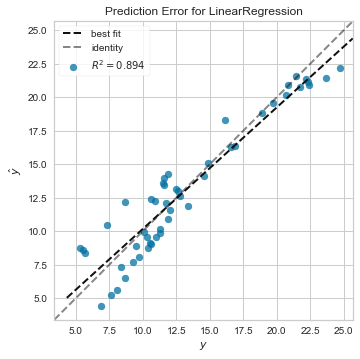

In [32]:
#Regresyon grafik çizim kütüphanesi
from yellowbrick.regressor import PredictionError,prediction_error

visualizer = prediction_error(model_2, x_train, y_train, x_test, y_test)

<AxesSubplot:xlabel='Sales'>

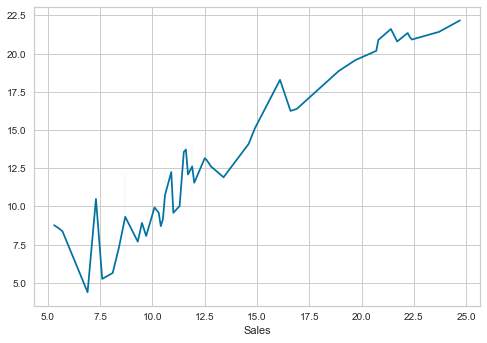

In [33]:
sns.lineplot(y_test,y_pred)

In [34]:
x2 = df[['TV', 'Radio']]
y2 = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x2, y2,test_size = 0.25, random_state=1)
model_3 = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")
print("*************************************")
print("RMSE: ", (mean_squared_error(y_test,y_pred))**0.5)
print("R^2: ", r2_score(y_test,y_pred))

Linear coefficients : [0.04660234 0.18117959]
Intercept : 2.9272373202664834
*************************************
RMSE:  1.3879034699382886
R^2:  0.9176214942248908


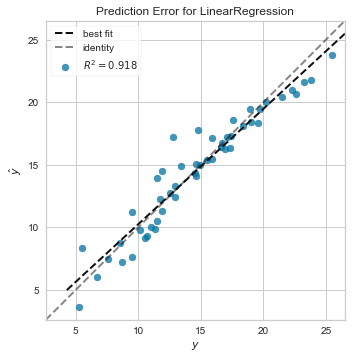

In [35]:
visualizer = prediction_error(model_3, x_train, y_train, x_test, y_test)

<AxesSubplot:xlabel='Sales'>

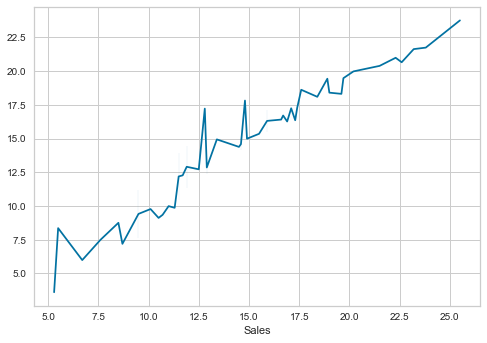

In [36]:
sns.lineplot(y_test,y_pred)

In [37]:
x3 = df[['TV', 'Newspaper']]
y3 = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x3, y3,test_size = 0.25, random_state=1)
model_4 = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")
print("*************************************")
print("RMSE: ", (mean_squared_error(y_test,y_pred))**0.5)
print("R^2: ", r2_score(y_test,y_pred))

Linear coefficients : [0.04714929 0.05655871]
Intercept : 5.359203256674126
*************************************
RMSE:  3.352056334433862
R^2:  0.5194727680455272


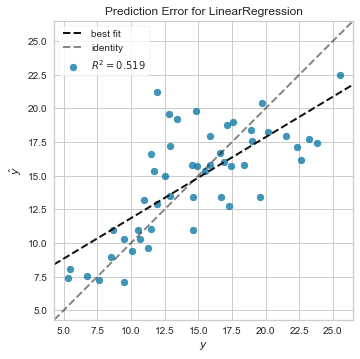

In [38]:
visualizer = prediction_error(model_4, x_train, y_train, x_test, y_test)

<AxesSubplot:xlabel='Sales'>

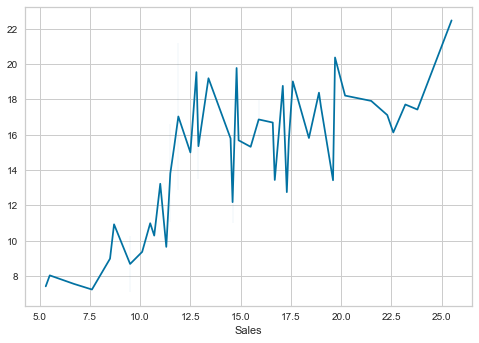

In [39]:
sns.lineplot(y_test,y_pred)

In [40]:
x4 = df[['Radio', 'Newspaper']]
y4 = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x4, y4,test_size = 0.25, random_state=1)
model_5 = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

print(f"Linear coefficients : {LR.coef_}")
print(f"Intercept : {LR.intercept_}")
print("*************************************")
print("RMSE: ", (mean_squared_error(y_test,y_pred))**0.5)
print("R^2: ", r2_score(y_test,y_pred))

Linear coefficients : [0.18526081 0.01380767]
Intercept : 9.116631864649118
*************************************
RMSE:  3.7486974974677265
R^2:  0.3990253133689111


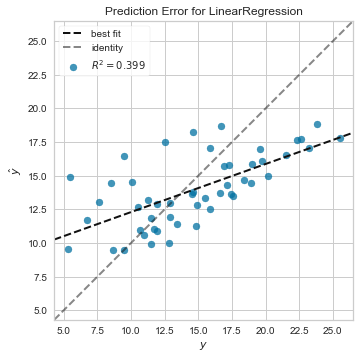

In [41]:
visualizer = prediction_error(model_4, x_train, y_train, x_test, y_test)               

<AxesSubplot:xlabel='Sales'>

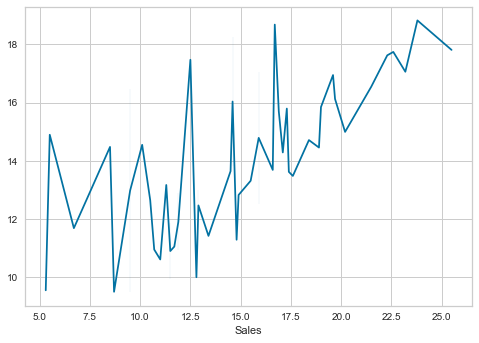

In [42]:
sns.lineplot(y_test,y_pred)